# Graph Cellular Automata

<hr>

- Graph Cellular Automata on Dynamic Random Digraphs
- Brain-Inspired Graph Cellular Automata
- Hamming Distance and Other Binary Similarity Measures
- Average Cell Entropy and Average Mutual Information

<hr>


In [1]:
import os
import sys
import numpy as np
import math as m
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pyglet
import random as rnd

from random_digraphs import *



## Graph Cellular Automata on Dynamic Random Digraphs


In [2]:
def neighborhood_density(M, i, state):
    sum = 0
    G = nx.from_numpy_matrix(M, create_using=nx.MultiDiGraph())
    for j in range(len(M)):
        sum = sum + M[i, j]*state[j]
        
    if len(list(G.neighbors(i))) != 0:
        d = (1/len(list(G.neighbors(i))))*sum
    else:
        d = 0
    return d


def threshold_neighborhood(M, initial_state, th):
    S = []
    G = nx.from_numpy_matrix(M, create_using=nx.MultiDiGraph())
    for i in range(len(M)):
        if  neighborhood_density(M, i, initial_state) > th:
            S.append(1 - initial_state[i])
        else:
            S.append(initial_state[i])
    return S


def Run_GCA_neighborhood(D, n_steps, initial_state, th):
    m_cells = len(D[0])
    GCA = np.zeros((n_steps, m_cells))
    GCA[0, :] = initial_state
    
    for i in range(1, n_steps):
        GCA[i, :] = threshold_neighborhood(D[i], GCA[i-1, :], th)
        
    return GCA

#Run_GCA(initial_state, 10, 24)

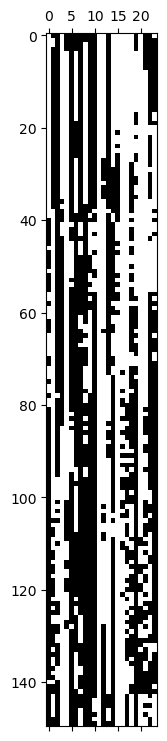

In [3]:
initial_state = np.random.RandomState(0).randint(0, 2, 24)

ER = directed_erdos_renyi_GnM_model(24, 140)
D = dynamic_random_digraph_model(ER, 0.96, 0.001, 150)

data = Run_GCA_neighborhood(D, 150, initial_state, 0.5)

plt.rcParams['image.cmap'] = 'binary' #black and white grid
fig, ax = plt.subplots(figsize=(15, 9))
ax.matshow(data)
ax.axis(True);

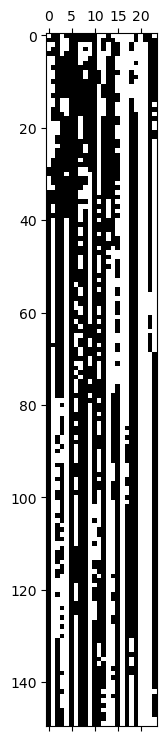

In [4]:
initial_state = np.random.RandomState(0).randint(0, 2, 24)

BA = directed_barabasi_albert_model(24, 0.9, 0.06, 0.04, 0.3, 0.3)
D = dynamic_random_digraph_model(BA, 0.96, 0.001, 150)

data = Run_GCA_neighborhood(D, 150, initial_state, 0.5)

plt.rcParams['image.cmap'] = 'binary' #black and white grid
fig, ax = plt.subplots(figsize=(15, 9))
ax.matshow(data)
ax.axis(True);

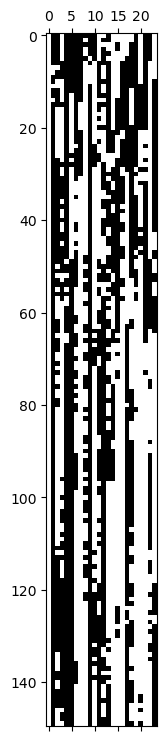

In [5]:
initial_state = np.random.RandomState(0).randint(0, 2, 24)

WS = directed_watts_strogatz_model(24, 8, 0.7)
D = dynamic_random_digraph_model(WS, 0.96, 0.001, 150)

data = Run_GCA_neighborhood(D, 150, initial_state, 0.5)

plt.rcParams['image.cmap'] = 'binary' #black and white grid
fig, ax = plt.subplots(figsize=(15, 9))
ax.matshow(data)
ax.axis(True);

In [6]:
def graph_cellular_automata(D, steps, rule, initial_state, th):
    
    if rule == 'neighborhood':
        data = Run_GCA_neighborhood(D, steps, initial_state, th)
    elif rule == 'weights':
        data = Run_GCA_weights(D, steps, initial_state, th)
    
    plt.rcParams['image.cmap'] = 'binary' #black and white grid
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.matshow(data)
    ax.axis(True);

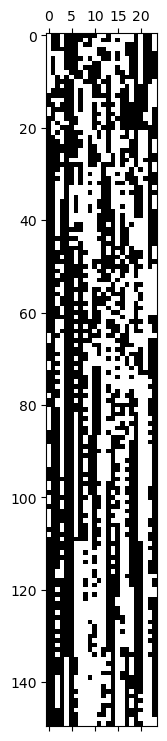

In [7]:
 graph_cellular_automata(D, 150, 'neighborhood', initial_state, 0.4)

<hr>

## Brain-Inspired Graph Cellular Automata

In [8]:

def average_state_in(M, v, initial_state):
    Sin1 = 0
    Sin0 = 0
    G = nx.from_numpy_matrix(M, create_using=nx.MultiDiGraph())
    for i in list(G.neighbors(v)):
        if initial_state[i] == 1:
            Sin1 += 1
        if initial_state[i] == 0:
            Sin0 += 1
            
    if Sin1 > Sin0:
        S = 1
    else:
        S = 0
    return S


def average_state_out(M, v, initial_state):
    Sin1 = 0
    Sin0 = 0
    G = nx.from_numpy_matrix(M, create_using=nx.MultiDiGraph())
    for i in list(G.predecessors(v)):
        if initial_state[i] == 1:
            Sin1 += 1
        if initial_state[i] == 0:
            Sin0 += 1
            
    if Sin1 > Sin0:
        S = 1
    else:
        S = 0
    return S


def in_state(M, initial_state):
    S=[]
    for v in range(len(M)):
        S.append(average_state_in(M, v, initial_state))
    return S

def out_state(M, initial_state):
    S=[]
    for v in range(len(M)):
        S.append(average_state_out(M, v, initial_state))
    return S


def brain_state(M, initial_state):
    bs = []
    for i in range(len(M)):
        bs.append(in_state(M, initial_state)[i])
        bs.append(initial_state[i])
        bs.append(out_state(M, initial_state)[i])
    return bs


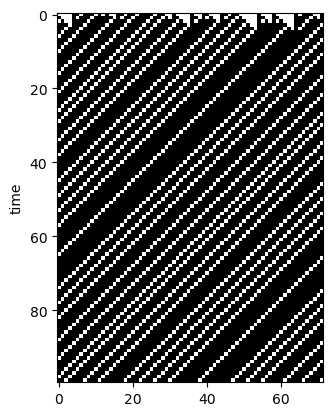

In [9]:
import cellpylib as cpl

#D should be a sequence of matrices of brain networks.
#Exemplifying, here D is just a sequence of random digraphs.
bs = np.array([brain_state(D[0], initial_state)])

cellular_automaton = cpl.evolve(bs, timesteps=100, memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 188))

cpl.plot(cellular_automaton)

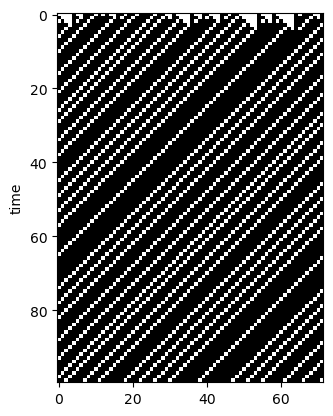

In [10]:
bs = np.array([brain_state(D[1], initial_state)])

cellular_automaton = cpl.evolve(bs, timesteps=100, memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 188))

cpl.plot(cellular_automaton)

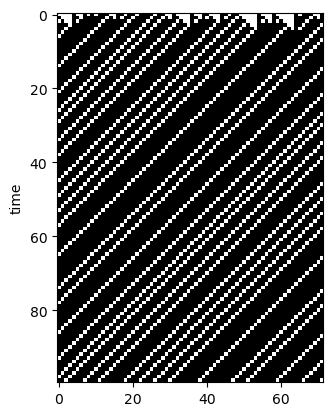

In [11]:
bs = np.array([brain_state(D[2], initial_state)])

cellular_automaton = cpl.evolve(bs, timesteps=100, memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 188))

cpl.plot(cellular_automaton)

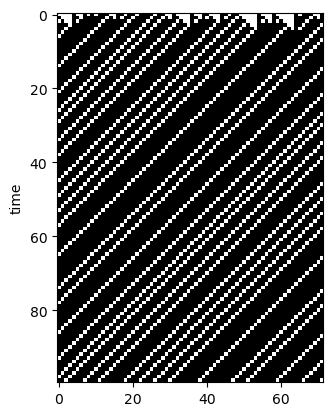

In [12]:
bs = np.array([brain_state(D[3], initial_state)])

cellular_automaton = cpl.evolve(bs, timesteps=100, memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 188))

cpl.plot(cellular_automaton)

In [13]:
print(brain_state(D[0], initial_state))

[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]


## Normalized Hamming Distance and other Binary Similarity Measures

In [14]:

def normalized_hamming_distance(seq1, seq2):
    '''Returns the normalized Hamming distance between two binary sequences.
    Parameters
    ----------
    seq1, seq2: (array) binary sequences.
    '''
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length.")
        
    N = len(seq1)
    dist_counter = 0
    for n in range(len(seq1)):
        if seq1[n] != seq2[n]:
            dist_counter += 1
    return dist_counter/N


In [15]:
initial_state = np.random.RandomState(0).randint(0, 2, 24)

bs1 = brain_state(D[0], initial_state)
bs2 = brain_state(D[4], initial_state)

normalized_hamming_distance(bs1, bs2)

0.041666666666666664

## Average Cell Entropy and Average Mutual Information

In [16]:
cellular_automaton_1 = cpl.evolve(bs, timesteps=100, memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 188))

In [17]:
cellular_automaton_2 = cpl.evolve(bs, timesteps=100, memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 101))

In [18]:
avg_cell_entropy_1 = cpl.average_cell_entropy(cellular_automaton_1)
avg_cell_entropy_1

0.6993689935731001

In [19]:
avg_cell_entropy_2 = cpl.average_cell_entropy(cellular_automaton_2)
avg_cell_entropy_2

0.9924091279278547

In [20]:
avg_mutual_information_1 = cpl.average_mutual_information(cellular_automaton_1)
avg_mutual_information_1

0.04605793427609655

In [21]:
avg_mutual_information_2 = cpl.average_mutual_information(cellular_automaton_2)
avg_mutual_information_2

0.004574110331546128